## Import packages

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from fbprophet import Prophet

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

## Load the dataset

In [70]:
df_origin=pd.read_csv('sample_data/new_normalized.csv')
df_origin

,date,age_0_17_doses,age_18_49_doses,age_50_64_doses,age_65_doses,gender_female_doses,gender_male_doses,race_american_doses,race_asian_doses,race_black_doses,...,avg_tobs,total_tests,hospitalized_covid_confirmed_patients,hospitalized_covid_patients,hospitalized_suspected_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,total_cases
0,4/23/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.565217,0.020608,0.000000,0.000258,0.001949,0.003231,0.000000,0.015152,0.004484,0.009741
1,4/24/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.608696,0.025494,0.000000,0.000000,0.000000,0.003231,0.000000,0.000000,0.005605,0.010831
2,4/25/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.630435,0.014154,0.000000,0.000000,0.000000,0.007505,0.000000,0.000000,0.004484,0.008292
3,4/26/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.586957,0.004314,0.000277,0.001034,0.005848,0.026144,0.000937,0.030303,0.023543,0.005980
4,4/27/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.565217,0.031478,0.001107,0.001550,0.003899,0.043491,0.001874,0.015152,0.134529,0.012405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2/16/2022,0.201149,0.090866,0.047206,0.030225,0.119256,0.115156,0.996655,0.069115,0.201675,...,0.173913,0.423509,0.473990,0.466667,0.181287,0.966698,0.335520,0.075758,0.581839,0.054156
665,2/17/2022,0.201397,0.093433,0.047906,0.029894,0.124268,0.113466,0.995154,0.070170,0.193201,...,0.217391,0.382972,0.000277,0.000258,0.000000,0.001441,0.000000,0.000000,0.002242,0.041366
666,2/18/2022,0.336959,0.121649,0.063301,0.032284,0.173566,0.154090,0.999228,0.115714,0.228030,...,0.239130,0.236595,0.000277,0.000258,0.000000,0.001740,0.000000,0.000000,0.000000,0.027617
667,2/19/2022,0.194336,0.063933,0.032257,0.013657,0.088100,0.086234,0.996346,0.068011,0.105614,...,0.260870,0.032533,0.001107,0.001034,0.000000,0.001243,0.001874,0.000000,0.000000,0.007874


In [71]:
df=df_origin.copy(deep=True)
df.drop(columns='date', inplace=True)
df

,age_0_17_doses,age_18_49_doses,age_50_64_doses,age_65_doses,gender_female_doses,gender_male_doses,race_american_doses,race_asian_doses,race_black_doses,race_hawaiian_doses,...,avg_tobs,total_tests,hospitalized_covid_confirmed_patients,hospitalized_covid_patients,hospitalized_suspected_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,total_cases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.565217,0.020608,0.000000,0.000258,0.001949,0.003231,0.000000,0.015152,0.004484,0.009741
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.608696,0.025494,0.000000,0.000000,0.000000,0.003231,0.000000,0.000000,0.005605,0.010831
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.630435,0.014154,0.000000,0.000000,0.000000,0.007505,0.000000,0.000000,0.004484,0.008292
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.586957,0.004314,0.000277,0.001034,0.005848,0.026144,0.000937,0.030303,0.023543,0.005980
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.565217,0.031478,0.001107,0.001550,0.003899,0.043491,0.001874,0.015152,0.134529,0.012405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.201149,0.090866,0.047206,0.030225,0.119256,0.115156,0.996655,0.069115,0.201675,0.165929,...,0.173913,0.423509,0.473990,0.466667,0.181287,0.966698,0.335520,0.075758,0.581839,0.054156
665,0.201397,0.093433,0.047906,0.029894,0.124268,0.113466,0.995154,0.070170,0.193201,0.157522,...,0.217391,0.382972,0.000277,0.000258,0.000000,0.001441,0.000000,0.000000,0.002242,0.041366
666,0.336959,0.121649,0.063301,0.032284,0.173566,0.154090,0.999228,0.115714,0.228030,0.224336,...,0.239130,0.236595,0.000277,0.000258,0.000000,0.001740,0.000000,0.000000,0.000000,0.027617
667,0.194336,0.063933,0.032257,0.013657,0.088100,0.086234,0.996346,0.068011,0.105614,0.106637,...,0.260870,0.032533,0.001107,0.001034,0.000000,0.001243,0.001874,0.000000,0.000000,0.007874


In [72]:
df.dtypes

age_0_17_doses                           float64
age_18_49_doses                          float64
age_50_64_doses                          float64
age_65_doses                             float64
gender_female_doses                      float64
gender_male_doses                        float64
race_american_doses                      float64
race_asian_doses                         float64
race_black_doses                         float64
race_hawaiian_doses                      float64
race_latino_doses                        float64
race_multirace_doses                     float64
race_other_doses                         float64
race_white_doses                         float64
age_0_17_deaths                          float64
age_18_49_deaths                         float64
age_50_64_deaths                         float64
age_65_deaths                            float64
gender_female_deaths                     float64
gender_male_deaths                       float64
race_white_deaths   

## Split the Dataset

In [73]:
# Separating out the features
X = df.loc[:, df.columns[:-1]].values
# Separating out the target
y = df.loc[:,['total_cases']].values

In [74]:
X.shape

(669, 40)

In [75]:
y.shape

(669, 1)

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [77]:
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (535, 40)
X_test Shape: (134, 40)
y_train Shape: (535, 1)
y_test Shape: (134, 1)


## Modelling

### Linear Regression

In [78]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
y_pred_lr =  lr.predict(X_test)
# Calculate mean squared error
print(f'Training score: {lr.score(X_train,y_train)}')
print(f'Testing score: {lr.score(X_test,y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred_lr, squared= False)}')
print(f'R2: {r2_score(y_test, y_pred_lr)}')

Training score: 0.795031776806839
Testing score: 0.7434519331702838
MSE: 0.004842885656555926
RMSE: 0.06959084463171808
R2: 0.7434519331702838


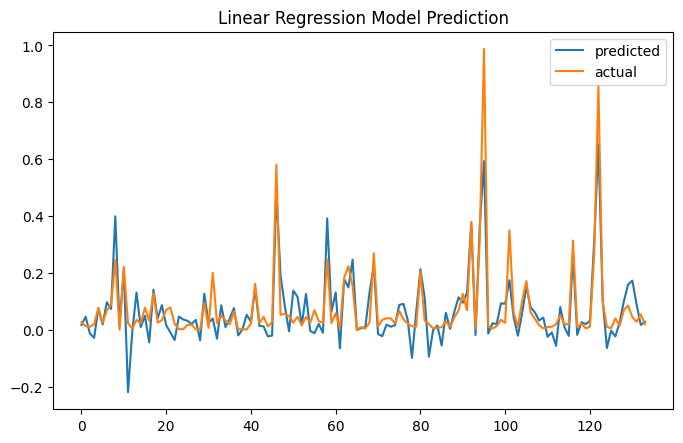

In [80]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(y_pred_lr, label='predicted')
plt.plot(y_test, label='actual')
plt.title('Linear Regression Model Prediction')
plt.legend()
plt.show()

### Random Forest

In [81]:
y_train=np.ravel(y_train)
y_train.shape

(535,)

In [82]:
# fit the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
 
# predict on the same period
y_pred_rf = rf.predict(X_test)

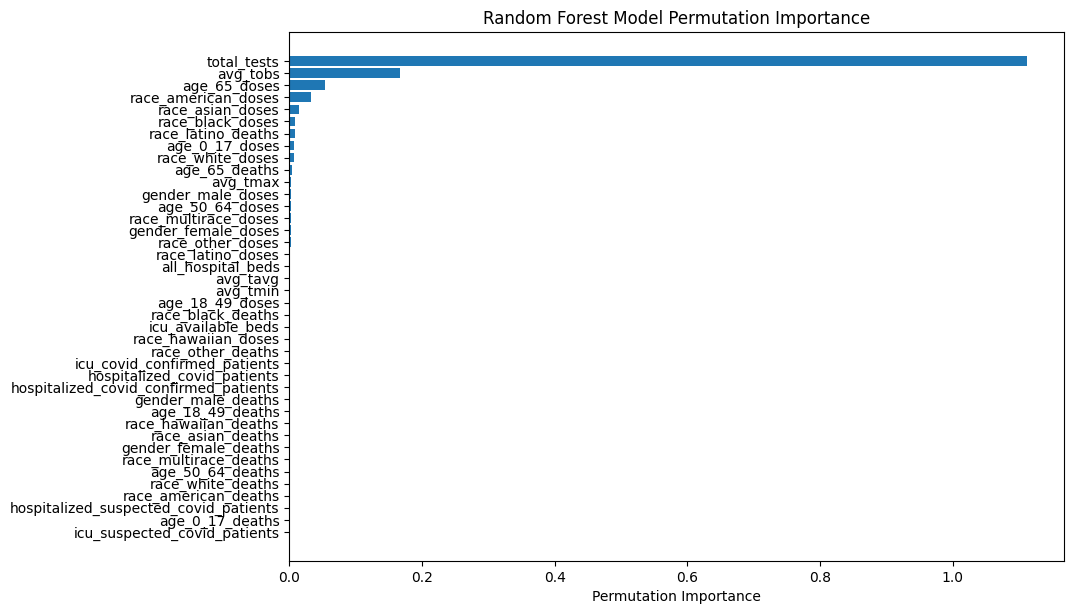

In [103]:
perm_importance = permutation_importance(rf, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
feature_names = np.array(list(df)[0:len(list(df))-1])
plt.figure(figsize = (10,7), dpi=100)
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Random Forest Model Permutation Importance')
plt.xlabel("Permutation Importance");

In [84]:
print(f'Training score: {rf.score(X_train,y_train)}')
print(f'Testing score: {rf.score(X_test,y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred_rf, squared= False)}')
print(f'R2: {r2_score(y_test, y_pred_rf)}')

Training score: 0.9900758479829341
Testing score: 0.9344580358780517
MSE: 0.001237242758720022
RMSE: 0.035174461740302754
R2: 0.9344580358780517


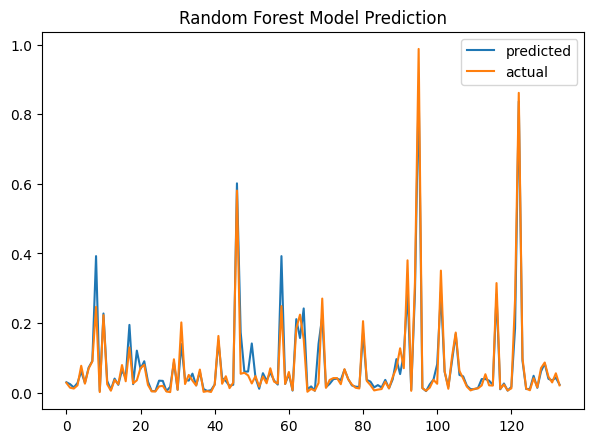

In [85]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(y_pred_rf, label='predicted')
plt.plot(y_test, label='actual')
plt.title('Random Forest Model Prediction')
plt.legend()
plt.show()

### XGBoost

In [86]:
import xgboost as xgb
 
# fit the model
xgboost = xgb.XGBRegressor(verbosity=0)
xgboost.fit(X_train, y_train)
 
# predict on the same period
y_pred_xgb = xgboost.predict(X_test)

In [87]:
print(f'Training score: {xgboost.score(X_train,y_train)}')
print(f'Testing score: {xgboost.score(X_test,y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_xgb)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred_xgb, squared= False)}')
print(f'R2: {r2_score(y_test, y_pred_xgb)}')

Training score: 0.9948794496509863
Testing score: 0.9667924705558211
MSE: 0.0006268621316161282
RMSE: 0.025037214933297358
R2: 0.9667924705558211


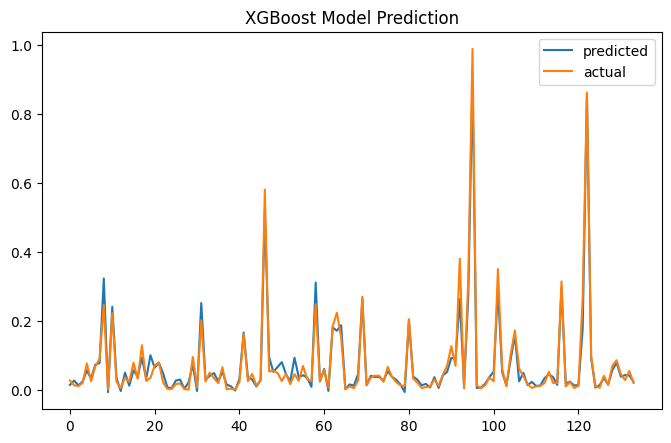

In [88]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(y_pred_xgb, label='predicted')
plt.plot(y_test, label='actual')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

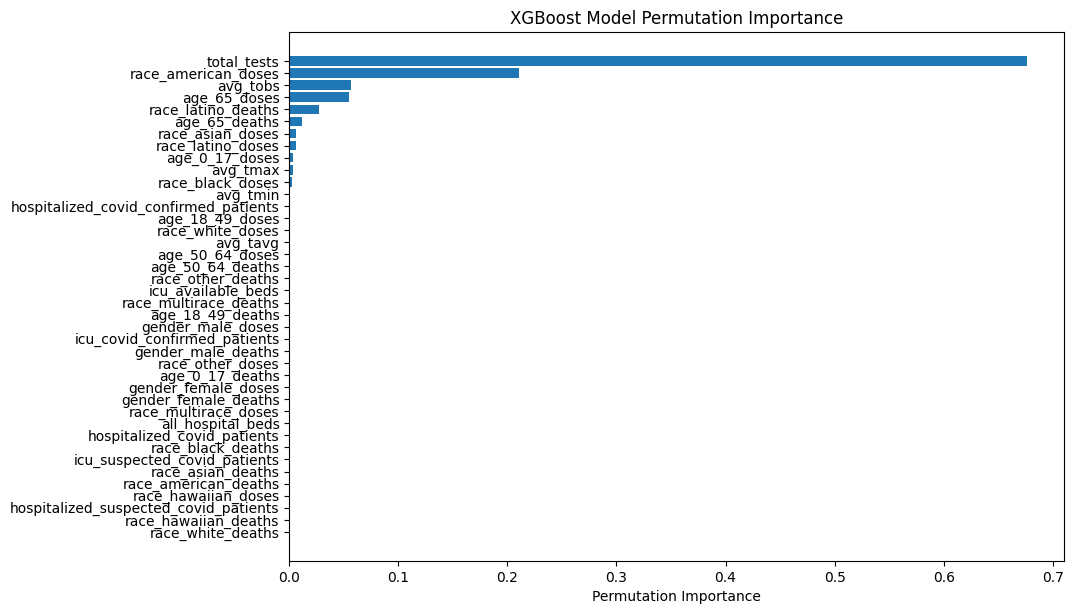

In [89]:
perm_importance = permutation_importance(xgboost, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
feature_names = np.array(list(df)[0:len(list(df))-1])
plt.figure(figsize = (10,7), dpi=100)
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('XGBoost Model Permutation Importance')
plt.xlabel("Permutation Importance");

### Prophet

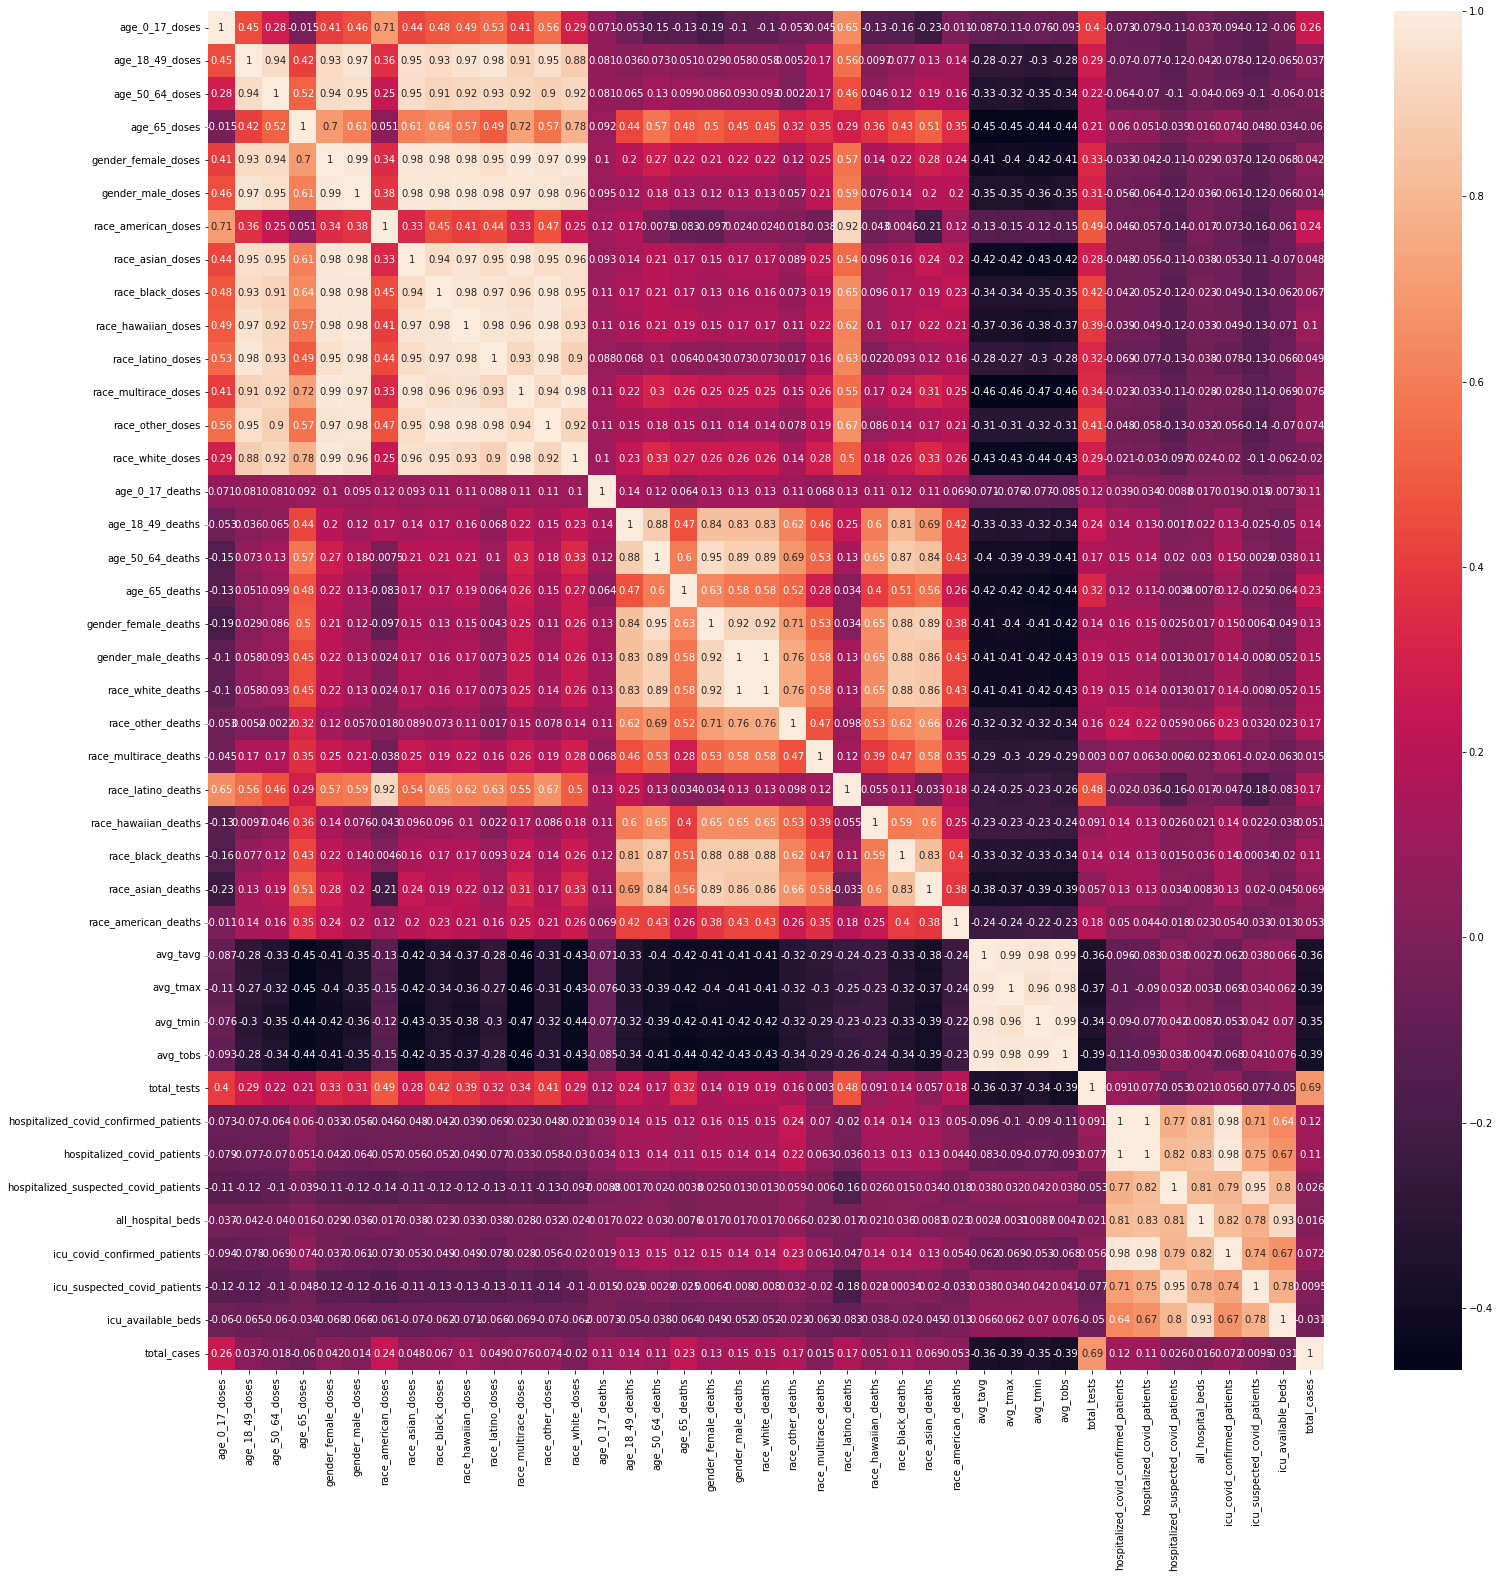

In [90]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True);

In [91]:
cases_data = df_origin[['date', 'total_cases']].groupby('date', as_index = False).sum()
cases_data.columns = ['ds', 'y']
cases_data.ds = pd.to_datetime(cases_data.ds)

In [92]:
cases_data.head()

,ds,y
0,2021-01-01,0.124053
1,2022-01-01,0.201876
2,2021-01-10,0.122095
3,2022-01-10,0.898020
4,2021-01-11,0.272661


In [93]:
proph = Prophet(yearly_seasonality=True, changepoint_range=1,changepoint_prior_scale=0.75)
proph.fit(cases_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
confirmed_pred = proph.make_future_dataframe(periods=28)
confirmed_pred.tail()

,ds
692,2022-03-16
693,2022-03-17
694,2022-03-18
695,2022-03-19
696,2022-03-20


In [95]:
confirmed_forecast = proph.predict(confirmed_pred)
confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
692,2022-03-16,-0.266224,-0.360365,-0.177643
693,2022-03-17,-0.283552,-0.372377,-0.194912
694,2022-03-18,-0.298754,-0.396321,-0.206473
695,2022-03-19,-0.328871,-0.424798,-0.236995
696,2022-03-20,-0.343458,-0.449436,-0.243441


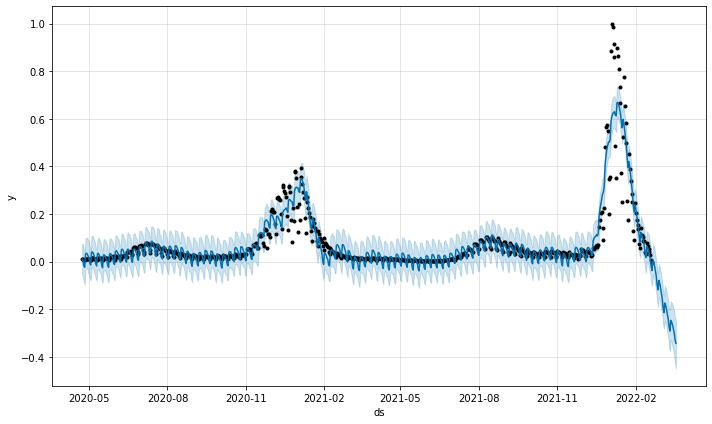

In [101]:
fig1 = proph.plot(confirmed_forecast)

In [97]:
metric_df = confirmed_forecast.set_index('ds')[['yhat']].join(cases_data.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
692,2022-03-16,-0.266224,NaN
693,2022-03-17,-0.283552,NaN
694,2022-03-18,-0.298754,NaN
695,2022-03-19,-0.328871,NaN
696,2022-03-20,-0.343458,NaN


In [98]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
664,2022-02-16,0.045912,0.054156
665,2022-02-17,0.028174,0.041366
666,2022-02-18,0.011807,0.027617
667,2022-02-19,-0.020237,0.007874
668,2022-02-20,-0.037490,0.000000


In [99]:
print(f'MSE: {mean_squared_error(metric_df.y, metric_df.yhat)}')
print(f'RMSE: {mean_squared_error(metric_df.y, metric_df.yhat, squared= False)}')
print(f'R2: {r2_score(metric_df.y, metric_df.yhat)}')

MSE: 0.002628573432848512
RMSE: 0.051269615103377866
R2: 0.8614204019817618
